In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
class myCallbacks(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.97:
      print("\nReached 97% accuracy so cancelling training!")
      self.model.stop_training = True
      

callbacks = myCallbacks()

In [ ]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
training_images, test_images = training_images / 255.0, test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(training_images, training_labels, validation_split=5/60, epochs=20, callbacks=[callbacks])

Epoch 1/20
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4022 - accuracy: 0.8587 - val_loss: 0.3179 - val_accuracy: 0.8848
Epoch 2/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2724 - accuracy: 0.9026 - val_loss: 0.2638 - val_accuracy: 0.9078
Epoch 3/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2251 - accuracy: 0.9178 - val_loss: 0.2527 - val_accuracy: 0.9086
Epoch 4/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.1939 - accuracy: 0.9284 - val_loss: 0.2513 - val_accuracy: 0.9112
Epoch 5/20
1719/1719 [==============================] - 35s 20ms/step - loss: 0.1660 - accuracy: 0.9383 - val_loss: 0.2498 - val_accuracy: 0.9172
Epoch 6/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.1427 - accuracy: 0.9473 - val_loss: 0.2399 - val_accuracy: 0.9188
Epoch 7/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.1230 - accuracy: 0.9545 - val_loss: 0.2725 -

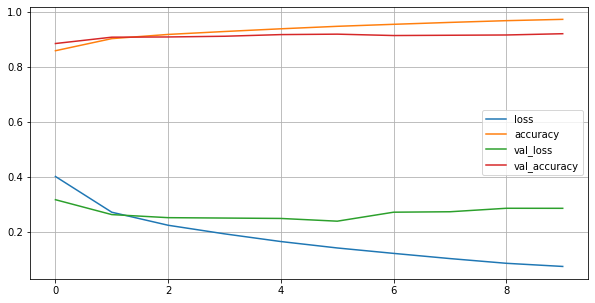

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.3135 - accuracy: 0.9141


[0.3134935796260834, 0.9140999913215637]